In [14]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_predict
from sklearn.metrics import make_scorer, accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [15]:
path = r'C:\Users\Facundo\Desktop\datas.csv'

In [16]:
df = pd.read_csv(path)

In [17]:
# Definir X (variables predictoras) y y (variable objetivo)
X = df.drop('adopted', axis=1)  # Seleccionar todas las columnas excepto 'adopted' como variables predictoras
y = df['adopted']  # Seleccionar la columna 'adopted' como variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba manteniendo la proporción de 'adopted'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Forma del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Forma del conjunto de prueba:", X_test.shape, y_test.shape)

Forma del conjunto de entrenamiento: (163857, 35) (163857,)
Forma del conjunto de prueba: (40965, 35) (40965,)


In [19]:
# Definir los hiperparámetros del modelo
xgb_params = {'colsample_bytree': 1.0,
              'gamma': 0,
              'learning_rate': 0.25,
              'max_depth': 13,
              'n_estimators': 30,
              'n_jobs': -1,
              'reg_alpha': 0.8,
              'reg_lambda': 0,
              'scale_pos_weight': 1,
              'subsample': 1.0}



# Crear el clasificador XGBoost con los hiperparámetros especificados
xgb_model = XGBClassifier(**xgb_params)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Realizar la validación cruzada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir los scorers para accuracy, precision y F1-score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

# Realizar la validación cruzada predictiva (predicciones en lugar de puntajes)
cv_predictions = cross_val_predict(xgb_model, X_train, y_train, cv=stratified_kfold)

# Evaluar métricas de rendimiento
accuracy = accuracy_score(y_train, cv_predictions)
precision = precision_score(y_train, cv_predictions)
f1 = f1_score(y_train, cv_predictions)

# Imprimir los puntajes de validación cruzada
print("Accuracy promedio:", accuracy)
print("Precision promedio:", precision)
print("F1-score promedio:", f1)



Accuracy promedio: 0.7501968179571211
Precision promedio: 0.7755482790130978
F1-score promedio: 0.8326724497387806


In [ ]:
# Hacer predicciones en el conjunto de prueba
predictions = xgb_model.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-score:", f1)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)


Accuracy: 0.7518369339680215
Precision: 0.7738899613899614
F1-score: 0.8346400338332411
Matriz de confusión:
[[ 5143  7496]
 [ 2670 25656]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.2],
    'n_estimators': [100, 300],
    'gamma': [0, 0.2],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [0,0.5],
    'scale_pos_weight': [0, 2],
    'n_jobs': [-1]
}

# Crear un clasificador XGBoost
xgb_model = XGBClassifier()

# Crear un objeto StratifiedKFold para la validación cruzada estratificada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=stratified_kfold, scoring='f1')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'n_jobs': -1, 'reg_alpha': 0.5, 'reg_lambda': 0, 'scale_pos_weight': 2, 'subsample': 1.0}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [7,9,10],
    'learning_rate': [0.2, 0.3, 0.5],
    'n_estimators': [50, 60, 100],
    'gamma': [0],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'reg_alpha': [0.5, 0.7, 0.9],
    'reg_lambda': [0.5,0.8, 0.6],
    'scale_pos_weight': [2, 3, 5],
    'n_jobs': [-1],
    
}

# Crear un clasificador XGBoost
xgb_model = XGBClassifier()

# Crear un objeto StratifiedKFold para la validación cruzada estratificada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=stratified_kfold, scoring='f1')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 50, 'n_jobs': -1, 'reg_alpha': 0.7, 'reg_lambda': 0.8, 'scale_pos_weight': 2, 'subsample': 1.0}


In [22]:
from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [10,15],
    'learning_rate': [0.2, 0.1],
    'n_estimators': [50, 30],
    'gamma': [0],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'reg_alpha': [0.6, 0.7],
    'reg_lambda': [0.8, 0.9],
    'scale_pos_weight': [2, 1],
    'n_jobs': [-1],
    'min_child_weight': [1, 3, 5],
    'colsample_bylevel': [0.7, 1.0]
    
    
}

# Crear un clasificador XGBoost
xgb_model = XGBClassifier()

# Crear un objeto StratifiedKFold para la validación cruzada estratificada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=stratified_kfold, scoring='f1')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 50, 'n_jobs': -1, 'reg_alpha': 0.6, 'reg_lambda': 0.9, 'scale_pos_weight': 2, 'subsample': 1.0}


In [25]:

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [10,11,12],
    'learning_rate': [0.1],
    'n_estimators': [50, 40],
    'gamma': [0],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'reg_alpha': [0.6],
    'reg_lambda': [0.9, 1],
    'scale_pos_weight': [2],
    'n_jobs': [-1],
    'min_child_weight': [1],
    'colsample_bylevel': [1.0]
    
    
}

# Crear un clasificador XGBoost
xgb_model = XGBClassifier()

# Crear un objeto StratifiedKFold para la validación cruzada estratificada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=stratified_kfold, scoring='f1')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 50, 'n_jobs': -1, 'reg_alpha': 0.6, 'reg_lambda': 1, 'scale_pos_weight': 2, 'subsample': 1.0}


In [26]:

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'max_depth': [10,11,12],
    'learning_rate': [0.1],
    'n_estimators': [50, 40],
    'gamma': [0],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'reg_alpha': [0.6],
    'reg_lambda': [0.1, 0, 1],
    'scale_pos_weight': [2],
    'n_jobs': [-1],
    'min_child_weight': [1],
    'colsample_bylevel': [1.0]
    
    
}

# Crear un clasificador XGBoost
xgb_model = XGBClassifier()

# Crear un objeto StratifiedKFold para la validación cruzada estratificada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(xgb_model, param_grid=param_grid, cv=stratified_kfold, scoring='f1')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_weight': 1, 'n_estimators': 50, 'n_jobs': -1, 'reg_alpha': 0.6, 'reg_lambda': 1, 'scale_pos_weight': 2, 'subsample': 1.0}


In [31]:
# Definir los hiperparámetros del modelo
xgb_params = {'colsample_bytree': 1.0,
              'gamma': 0,
              'learning_rate': 0.1,
              'max_depth': 11,
              'n_estimators': 50,
              'n_jobs': -1,
              'reg_alpha': 0.6,
              'reg_lambda': 1,
              'scale_pos_weight': 1,
              'subsample': 1.0,
              'colsample_bylevel': 1.0,
              'min_child_weight': 1}



# Crear el clasificador XGBoost con los hiperparámetros especificados
xgb_model = XGBClassifier(**xgb_params)

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Realizar la validación cruzada
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir los scorers para accuracy, precision y F1-score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

# Realizar la validación cruzada predictiva (predicciones en lugar de puntajes)
cv_predictions = cross_val_predict(xgb_model, X_train, y_train, cv=stratified_kfold)

# Evaluar métricas de rendimiento
accuracy = accuracy_score(y_train, cv_predictions)
precision = precision_score(y_train, cv_predictions)
f1 = f1_score(y_train, cv_predictions)

# Imprimir los puntajes de validación cruzada
print("Accuracy promedio:", accuracy)
print("Precision promedio:", precision)
print("F1-score promedio:", f1)



Accuracy promedio: 0.7523023123821381
Precision promedio: 0.7744272936558856
F1-score promedio: 0.8348692160285125


In [29]:
# Hacer predicciones en el conjunto de prueba
predictions = xgb_model.predict(X_test)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-score:", f1)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

Accuracy: 0.7519101672159161
Precision: 0.7735309177434415
F1-score: 0.83482048531539
Matriz de confusión:
[[ 5120  7519]
 [ 2644 25682]]


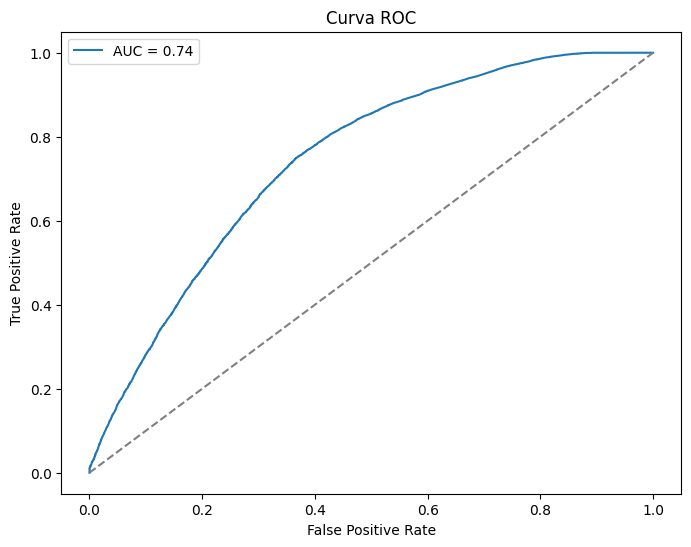

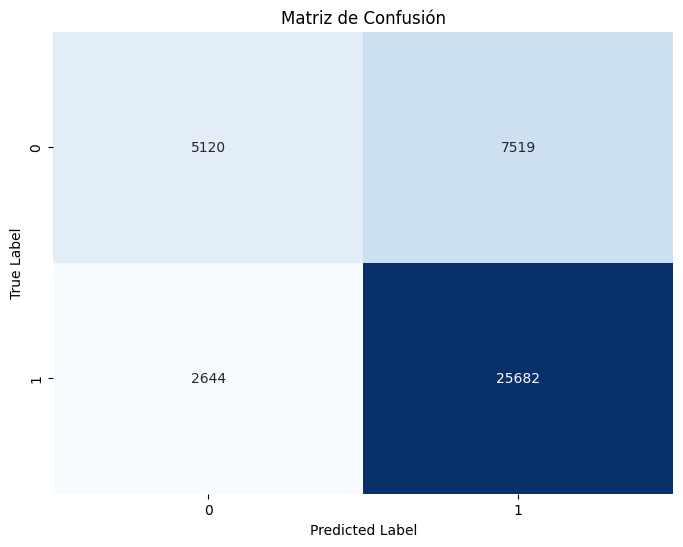

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades predichas
probabilities = xgb_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC y el AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = roc_auc_score(y_test, probabilities)

# Plotear la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Crear un heatmap de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()


In [47]:
predicciones = pd.Series(predictions)

predicciones.value_counts()

1    33201
0     7764
Name: count, dtype: int64

In [49]:
df['adopted'].value_counts()

adopted
1    141628
0     63194
Name: count, dtype: int64